In [2]:
import torch as t
import matplotlib.pylab as plt

In [3]:
x = t.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [4]:
y = x**2


In [5]:
y.backward()

In [7]:
print(x.grad)

tensor(4.)


In [8]:
print('data:',x.data)
print('grad_fn:',x.grad_fn)
print('grad:',x.grad)
print("is_leaf:",x.is_leaf)
print("requires_grad:",x.requires_grad)

data: tensor(2.)
grad_fn: None
grad: tensor(4.)
is_leaf: True
requires_grad: True


In [9]:
print('data:',y.data)
print('grad_fn:',y.grad_fn)
print('grad:',y.grad)
print("is_leaf:",y.is_leaf)
print("requires_grad:",y.requires_grad)

data: tensor(4.)
grad_fn: <PowBackward0 object at 0x000001C1F0167940>
grad: None
is_leaf: False
requires_grad: True


C:\Users\gunay\AppData\Local\Temp\ipykernel_28504\1355624623.py:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\build\aten\src\ATen/core/TensorBody.h:497.)
  print('grad:',y.grad)


In [10]:
x = t.tensor(2.0, requires_grad=True)
y = x**2+2*x+1
y.backward()
print(x.grad)

tensor(6.)


In [11]:
print('data:',x.data)
print('grad_fn:',x.grad_fn)
print('grad:',x.grad)
print("is_leaf:",x.is_leaf)
print("requires_grad:",x.requires_grad)

data: tensor(2.)
grad_fn: None
grad: tensor(6.)
is_leaf: True
requires_grad: True


In [12]:
print('data:',y.data)
print('grad_fn:',y.grad_fn)
print('grad:',y.grad)
print("is_leaf:",y.is_leaf)
print("requires_grad:",y.requires_grad)

data: tensor(9.)
grad_fn: <AddBackward0 object at 0x000001C1F00666B0>
grad: None
is_leaf: False
requires_grad: True


C:\Users\gunay\AppData\Local\Temp\ipykernel_28504\1355624623.py:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\build\aten\src\ATen/core/TensorBody.h:497.)
  print('grad:',y.grad)


In [13]:
# Practice: Calculate the derivative of y = 2x^3 + x at x = 1
x = t.tensor(1.0, requires_grad=True)
y = 2*x**3 + x
y.backward()
print(x.grad)

tensor(7.)


In [14]:
# custom autograd functions
class SQ(t.autograd.Function):


    @staticmethod
    def forward(ctx,i):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        result=i**2
        ctx.save_for_backward(i)
        return result

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        i, = ctx.saved_tensors
        grad_output = 2*i
        return grad_output

In [15]:
x=t.tensor(2.0,requires_grad=True )
sq=SQ.apply

y=sq(x)
y
print(y.grad_fn)
y.backward()
x.grad

tensor(4.)

In [16]:
# partial derivatives
u = t.tensor(1.0, requires_grad=True)
v = t.tensor(2.0, requires_grad=True)

f = u*v + u**2

print(f)

tensor(3., grad_fn=<AddBackward0>)


In [17]:
f.backward()

In [18]:
print(u.grad)

tensor(4.)


In [19]:
print(v.grad)

tensor(1.)


In [23]:
# calculate the derivative with multiple values

x = t.linspace(-10, 10, 10, requires_grad=True)

Y = x**2
y = t.sum(x**2)


In [24]:
y.backward()

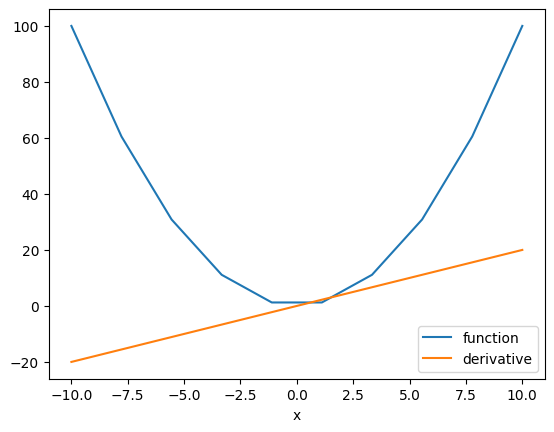

In [25]:
plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivative')
plt.xlabel('x')
plt.legend()
plt.show()

In [26]:
# relu activation function
x = t.linspace(-10, 10, 1000, requires_grad=True)
Y = t.relu(x)
y = Y.sum()

y.backward()

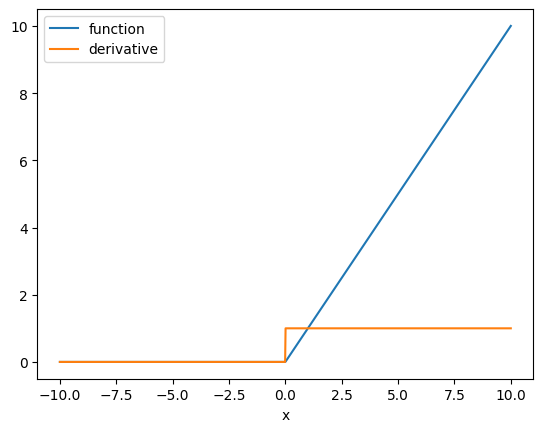

In [27]:
plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivative')
plt.xlabel('x')
plt.legend()
plt.show()

In [28]:
# Practice: Calculate the derivative of f = u * v + (u * v) ** 2 at u = 2, v = 1

u = t.tensor(2.0, requires_grad=True)
v = t.tensor(1.0, requires_grad=True)

f = u * v + (u * v) ** 2

f.backward()

In [29]:
print(u.grad)
print(v.grad)

tensor(5.)
tensor(10.)
